## Inference Profiling of LSTM Prefetcher

In [24]:
import os
import math
import torch
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter
matplotlib.rcParams.update({'font.size': 14})

prediction_sizes = [1, 2, 4, 8]
threads = [1, 2, 4, 8]
plot_colors = ['b', 'r+', '#7CFA6D', 'k+']

def plot_err(y_dats, y_err, l_base, yticks=None, col_off=0):
    # f, ax = plt.subplots()
    for y, e, l, c in zip(y_dats, y_err, threads[:len(y_dats)], plot_colors[col_off: col_off+len(y_dats)]):
        if l == 1:
            # label = l_base + " - 1 Thread"
            label = l_base + ""
        else:
            # label = l_base + " - " + str(l) + " Threads"
            label = l_base + " " + str(l) + "T"
        ax.plot(prediction_sizes, y, c, label=label)

def sv_fig(title, fname):
    # plt.title(title)
    plt.savefig("figs/" + fname, bbox_inches="tight")
    plt.show()

def get_data(fname):
    f = open(fname, 'r')
    data = np.array([float(l) for l in f.readlines()])
    f.close()
    return data

def get_dat_dir(dirname):
    data = []
    dir = os.fsencode(dirname)
    flist = os.listdir(dir)
    flist.sort(key=lambda x: os.stat(os.path.join(dir, x)).st_mtime)
    for f in flist:
        fname = dirname + "/" + os.fsdecode(f)
        data.append(get_data(fname))
    return data

### 1) 2.5k classes, 32 hidden dimensions, 32 embedding dimensions

In [25]:
dt1 = get_dat_dir("data/2p5k_EH32/t1")
dt2 = get_dat_dir("data/2p5k_EH32/t2")
dt4 = get_dat_dir("data/2p5k_EH32/t4")
data = [dt1, dt2]
data = [dt1]

qt1 = get_dat_dir("data/q_2p5/t1")
qt2 = get_dat_dir("data/q_2p5/t2")
qt4 = get_dat_dir("data/q_2p5/t4")
qdata = [qt1, qt2]
qdata = [qt1]

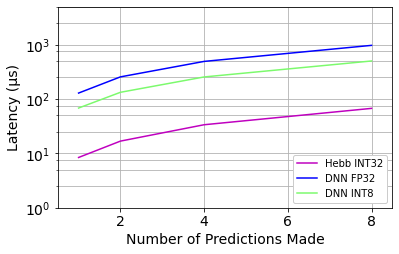

In [30]:
ydat = [[d.mean() for d in dt] for dt in data]
yerr = [[d.std() for d in dt] for dt in data]

cdat = torch.tensor([8.374, 8.389, 8.519, 8.278, 8.555])
cavg = cdat.mean()
cstd = cdat.std()
cplot = (torch.tensor([1,2,4,8]) * cavg).tolist()
cerr = (torch.tensor([1,2,4,8]) * cstd).tolist()

qdat = [[d.mean() for d in dt] for dt in qdata]
qerr = [[d.std() for d in dt] for dt in qdata]

yticks=[1, 10, 100, 1001]
min_ticks = [2.5, 5, 7.5, 25, 50, 75, 250, 500, 750, 2500, 5000]

fig, ax = plt.subplots(figsize=(6,3.7))
# ax = fig.add_subplot(1,1,1)
ax.plot(prediction_sizes, cplot, color="m", label="Hebb INT32")
ax.set_xlabel("Number of Predictions Made")
ax.set_ylabel("Latency (\u03BCs)")

plot_err(ydat, yerr, "DNN FP32", yticks=yticks)
plot_err(qdat, qerr, "DNN INT8", col_off=2, yticks=yticks)
ax.set_ylim([1,5e3])
ax.set_yscale('log', base=10)
ax.set_yticks(yticks) # Grid
ax.set_yticks(min_ticks, minor=True)
ax.set_xticks([2, 4, 6, 8])
ax.set_xlim([0.5,8.5])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda v,_: ("$10^{%d}$" % math.log(v,10)) ))
ax.grid(which='both')
# ax.legend(loc=(1.01, 0), framealpha=1)
plt.rc('legend', fontsize=10) 
plt.legend(loc="lower right", framealpha=1)
sv_fig("Inference Time for Learning Models", "inference_lat.svg")

### 2) 10k classes, 32 hidden dimensions, 32 embedding dimensions

In [27]:
# dt1 = get_dat_dir("data/10k_EH32/t1")
# dt2 = get_dat_dir("data/10k_EH32/t2")
# dt4 = get_dat_dir("data/10k_EH32/t4")
# dt8 = get_dat_dir("data/10k_EH32/t8")
# data = [dt1, dt2, dt4, dt8]

# ydat = [[d.mean() for d in dt] for dt in data]
# yerr = [[d.std() for d in dt] for dt in data]
# plot_err(ydat, yerr, "Inference Time for C=10k, E=H=32",
#     "10k_EH32_inf.jpeg")

### 3) 20k classes, 256 hidden dimensions, 256 embedding dimensions

In [28]:
# dt1 = get_dat_dir("data/20k_EH256/t1")
# dt2 = get_dat_dir("data/20k_EH256/t2")
# dt4 = get_dat_dir("data/20k_EH256/t4")
# dt8 = get_dat_dir("data/20k_EH256/t8")
# data = [dt1, dt2, dt4, dt8]

# ydat = [[d.mean() for d in dt] for dt in data]
# yerr = [[d.std() for d in dt] for dt in data]
# yerr[0][3] /= 100
# plot_err(ydat, yerr, "Inference Time for C=20k, E=H=256",
#     "20k_EH256_inf.jpeg")

In [29]:
# from matplotlib import pyplot as plt
# import matplotlib.ticker

# fig1, ax1 = plt.subplots()
# ax1.plot([10, 100, 1000], [1,2,3])
# ax1.set_yscale('log')
# ax1.set_yticks([20, 300, 500])
# ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
# plt.show()